<a href="https://colab.research.google.com/github/Nawaf9997/test_t5/blob/main/Copy_of_Task_1_Artificial_Neural_Networks_(ANN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exam on Artificial Neural Networks (ANN)

Welcome the Artificial Neural Networks (ANN) practical exam. In this exam, you will work on a classification task to predict the outcome of incidents involving buses. You are provided with a dataset that records breakdowns and delays in bus operations. Your task is to build, train, and evaluate an ANN model.

---

## Dataset Overview

### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing)

### **Dataset Name:** Bus Breakdown and Delays

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.

### **Features:**
The dataset contains the following columns:

- `School_Year`
- `Busbreakdown_ID`
- `Run_Type`
- `Bus_No`
- `Route_Number`
- `Reason`
- `Schools_Serviced`
- `Occurred_On`
- `Created_On`
- `Boro`
- `Bus_Company_Name`
- `How_Long_Delayed`
- `Number_Of_Students_On_The_Bus`
- `Has_Contractor_Notified_Schools`
- `Has_Contractor_Notified_Parents`
- `Have_You_Alerted_OPT`
- `Informed_On`
- `Incident_Number`
- `Last_Updated_On`
- `Breakdown_or_Running_Late` (Target Column)
- `School_Age_or_PreK`

## Load Data

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values**

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

In [3]:
df = pd.read_csv('/content/Bus_Breakdown_and_Delays.csv')
df

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,...,10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,NaN,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,...,25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,NaN,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,...,15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,NaN,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,...,10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,NaN,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,...,10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,NaN,09/18/2015 07:56:40 AM,Running Late,Pre-K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147967,2016-2017,1338452,Pre-K/EI,9345,2,Heavy Traffic,C530,04/05/2017 08:00:00 AM,04/05/2017 08:10:00 AM,Bronx,...,15-20,7,Yes,Yes,No,04/05/2017 08:10:00 AM,NaN,04/05/2017 08:10:15 AM,Running Late,Pre-K
147968,2016-2017,1341521,Pre-K/EI,0001,5,Heavy Traffic,C579,04/24/2017 07:42:00 AM,04/24/2017 07:44:00 AM,Bronx,...,20 MINS,0,Yes,Yes,No,04/24/2017 07:44:00 AM,NaN,04/24/2017 07:44:15 AM,Running Late,Pre-K
147969,2016-2017,1353044,Special Ed PM Run,GC0112,X928,Heavy Traffic,09003,05/25/2017 04:22:00 PM,05/25/2017 04:28:00 PM,Bronx,...,20-25MINS,0,Yes,Yes,Yes,05/25/2017 04:28:00 PM,90323827,05/25/2017 04:34:36 PM,Running Late,School-Age
147970,2016-2017,1353045,Special Ed PM Run,5525D,Q920,Won`t Start,24457,05/25/2017 04:27:00 PM,05/25/2017 04:30:00 PM,Queens,...,NaN,0,Yes,Yes,No,05/25/2017 04:30:00 PM,NaN,05/25/2017 04:30:07 PM,Breakdown,School-Age


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      147972 non-null  object
 1   Busbreakdown_ID                  147972 non-null  int64 
 2   Run_Type                         147883 non-null  object
 3   Bus_No                           147972 non-null  object
 4   Route_Number                     147884 non-null  object
 5   Reason                           147870 non-null  object
 6   Schools_Serviced                 147972 non-null  object
 7   Occurred_On                      147972 non-null  object
 8   Created_On                       147972 non-null  object
 9   Boro                             141654 non-null  object
 10  Bus_Company_Name                 147972 non-null  object
 11  How_Long_Delayed                 126342 non-null  object
 12  Number_Of_Studen

In [5]:
df.dtypes

,0
School_Year,object
Busbreakdown_ID,int64
Run_Type,object
Bus_No,object
Route_Number,object
Reason,object
Schools_Serviced,object
Occurred_On,object
Created_On,object
Boro,object


In [6]:
df.sample(5)

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
96179,2016-2017,1317088,Special Ed AM Run,2693,L565,Heavy Traffic,15854,01/20/2017 05:56:00 AM,01/20/2017 05:58:00 AM,NaN,...,15 MINS,0,Yes,Yes,Yes,01/20/2017 05:58:00 AM,NaN,01/20/2017 05:58:09 AM,Running Late,School-Age
90680,2016-2017,1311419,Special Ed AM Run,4034,K054,Mechanical Problem,19089,01/03/2017 07:09:00 AM,01/03/2017 07:10:00 AM,Brooklyn,...,20 MINS,0,Yes,Yes,No,01/03/2017 07:10:00 AM,NaN,01/03/2017 08:37:40 AM,Running Late,School-Age
85177,2016-2017,1305915,General Ed AM Run,2679,Q2422,Heavy Traffic,24077,12/07/2016 07:12:00 AM,12/07/2016 07:19:00 AM,Queens,...,30 MINS,0,Yes,No,No,12/07/2016 07:19:00 AM,NaN,12/07/2016 07:19:43 AM,Running Late,School-Age
53430,2015-2016,1273806,Special Ed AM Run,NI2124,K002,Heavy Traffic,21199,06/07/2016 06:30:00 AM,06/07/2016 06:51:00 AM,Brooklyn,...,15,1,Yes,Yes,No,06/07/2016 06:51:00 AM,NaN,06/07/2016 06:51:14 AM,Running Late,School-Age
62667,2016-2017,1283419,Special Ed AM Run,NI3186,K166,Problem Run,21423,09/13/2016 07:10:00 AM,09/13/2016 07:23:00 AM,Brooklyn,...,45 MIN,4,Yes,Yes,No,09/13/2016 07:23:00 AM,NaN,09/13/2016 07:23:10 AM,Running Late,School-Age


## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.

In [7]:
df.isnull().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,89
Bus_No,0
Route_Number,88
Reason,102
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,6318


In [8]:
#for loop to cheak missing value and fill it with mode
mode_columns = ['Run_Type','Route_Number','Reason', 'Boro', 'How_Long_Delayed', 'Incident_Number']


for col in mode_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)


print(df.isna().sum())

School_Year                        0
Busbreakdown_ID                    0
Run_Type                           0
Bus_No                             0
Route_Number                       0
Reason                             0
Schools_Serviced                   0
Occurred_On                        0
Created_On                         0
Boro                               0
Bus_Company_Name                   0
How_Long_Delayed                   0
Number_Of_Students_On_The_Bus      0
Has_Contractor_Notified_Schools    0
Has_Contractor_Notified_Parents    0
Have_You_Alerted_OPT               0
Informed_On                        0
Incident_Number                    0
Last_Updated_On                    0
Breakdown_or_Running_Late          0
School_Age_or_PreK                 0
dtype: int64


In [9]:
df.duplicated().sum()

0

In [ ]:
df['Run_Type'].unique()

In [ ]:
df.sample(5)

In [10]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
 # to see all of the columns and rows

In [11]:
df.replace(['na', 'Na', 'nA', 'NA', 'nan', 'Nan', 'nAn', 'NAn', 'naN', 'NaN', 'nAN', 'NAN', 'Unknown', 'other', "unknown", "other", "Other", "Unknown"], np.nan, inplace=True)

df
# to change any row with nul value to real nul value

In [12]:
df.drop(['School_Year', 'Busbreakdown_ID', 'Occurred_On', 'Created_On', 'Informed_On', 'Last_Updated_On', 'Bus_Company_Name', 'Incident_Number'], axis=1)
#drop any columns that we don't need it for ANN

In [13]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
categorical_features = df.select_dtypes(include=['object']).columns
for feature in categorical_features:
    df[feature] = label_encoder.fit_transform(df[feature])
print(df.head())
#to conver because learn the ANN model

   School_Year  Busbreakdown_ID  Run_Type  Bus_No  Route_Number  Reason  \
0            0          1224901         3    7481            77       9   
1            0          1225098         3    8114            77       3   
2            0          1215800         3    4662           209       3   
3            0          1215511         3    4547           209       9   
4            0          1215828         3    4554           209       9   

   Schools_Serviced  Occurred_On  Created_On  Boro  Bus_Company_Name  \
0              5003        56392       61017     1                27   
1              5071        56698       61329     1                27   
2              4969        48207       51829     1                27   
3              4968        48064       51656     1                27   
4              5149        48210       51836     1                27   

   How_Long_Delayed  Number_Of_Students_On_The_Bus  \
0               191                              5   
1       

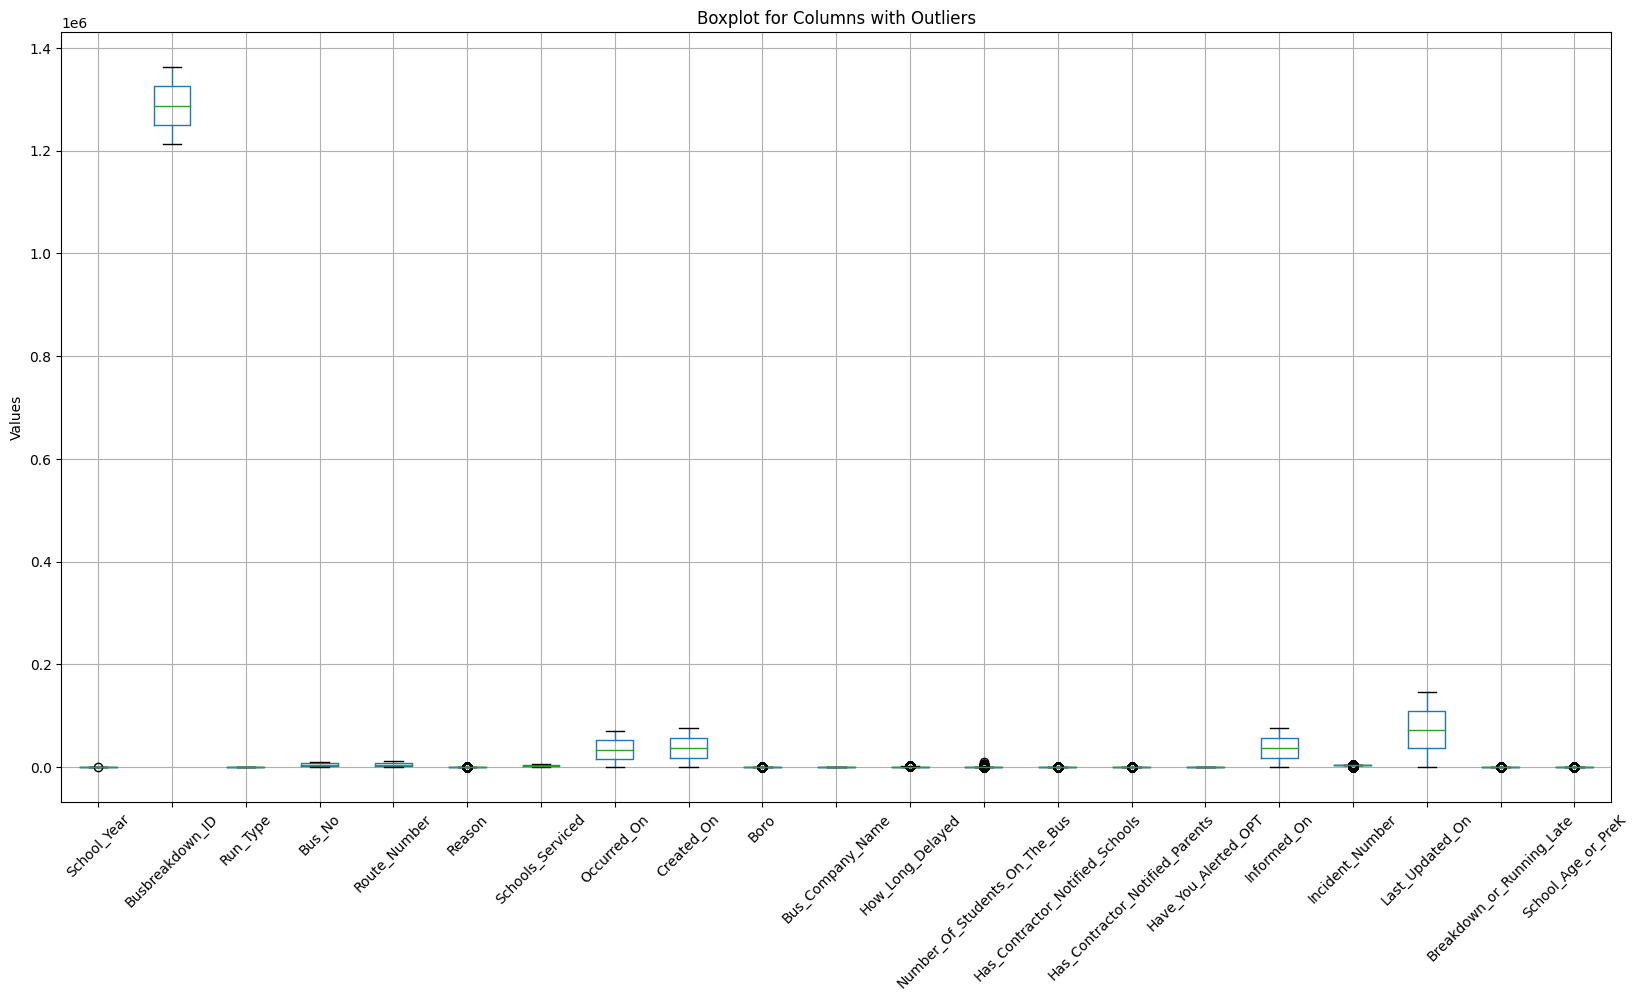

In [14]:
#cheak outliers


col_with_outliers = ['School_Year','Busbreakdown_ID', 'Run_Type', 'Bus_No', 'Route_Number', 'Reason', 'Schools_Serviced', 'Occurred_On', 'Created_On', 'Boro', 'Bus_Company_Name', 'How_Long_Delayed', 'Number_Of_Students_On_The_Bus', 'Has_Contractor_Notified_Schools', 'Has_Contractor_Notified_Parents', 'Have_You_Alerted_OPT', 'Informed_On', 'Incident_Number', 'Last_Updated_On', 'Breakdown_or_Running_Late', 'School_Age_or_PreK']
plt.figure(figsize=(20, 10))
df[col_with_outliers].boxplot()

plt.title('Boxplot for Columns with Outliers')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()
#we have here a hghier Busbreakdown_ID outlier

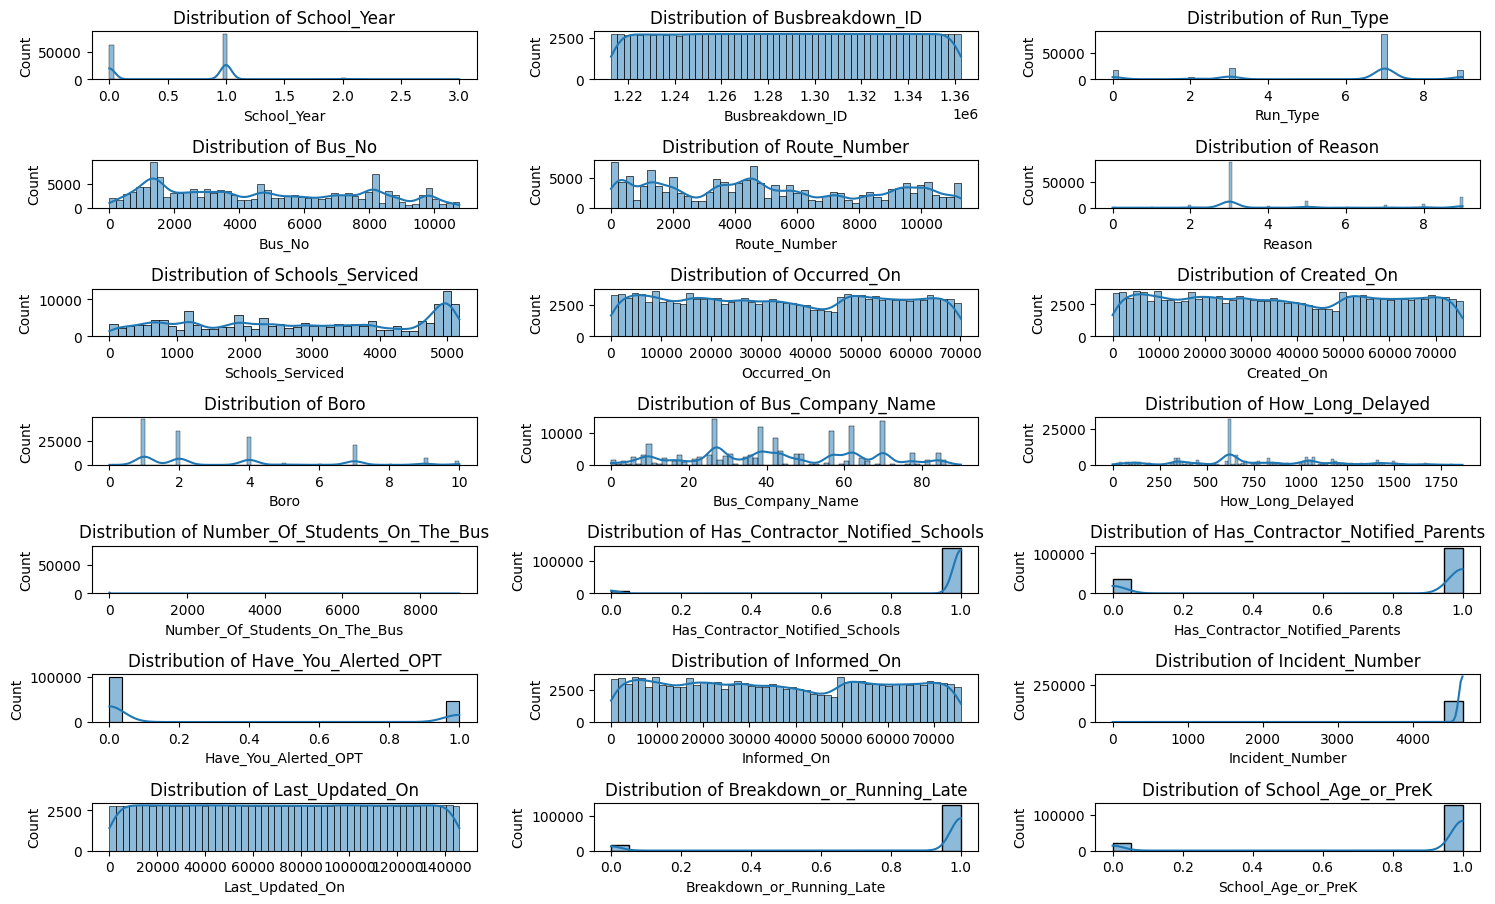

In [15]:
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(len(numerical_features) // 3 + 1, 3, i + 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

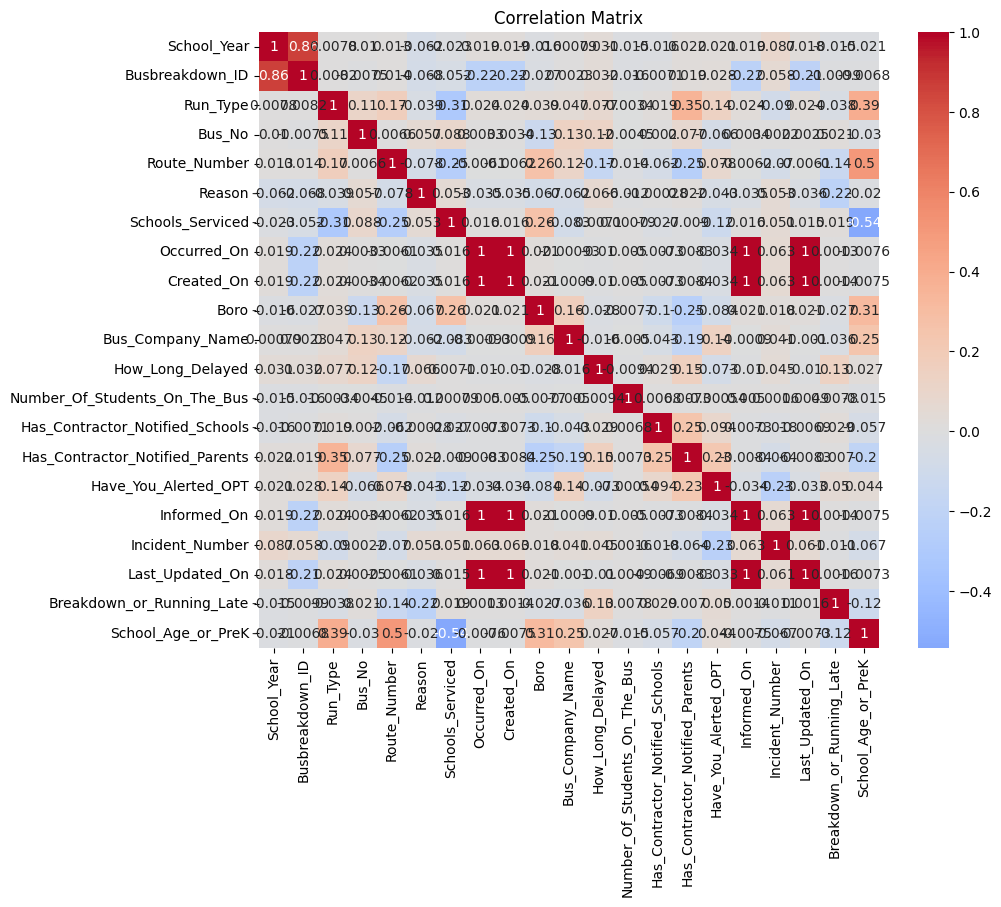

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix")
plt.show()

In [16]:
X = df.drop('Breakdown_or_Running_Late', axis=1)
y = df['Breakdown_or_Running_Late']

## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#Define the model
model = Sequential()
model.add(Dense(10, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metrics.

In [19]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Training the Model
Train the ANN model using the training data.

In [20]:
history = model.fit(X_train, y_train, epochs=20, validation_split=0.2, verbose=1)

Epoch 1/20
2960/2960 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7952 - loss: 261.6365 - val_accuracy: 0.8860 - val_loss: 101.4529
Epoch 2/20
2960/2960 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7994 - loss: 56.0916 - val_accuracy: 0.8860 - val_loss: 7.0567
Epoch 3/20
2960/2960 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8014 - loss: 12.1847 - val_accuracy: 0.8860 - val_loss: 0.5184
Epoch 4/20
2960/2960 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.8479 - loss: 1.0258 - val_accuracy: 0.8860 - val_loss: 0.3629
Epoch 5/20
2960/2960 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8810 - loss: 0.3832 - val_accuracy: 0.8860 - val_loss: 0.3547
Epoch 6/20
2960/2960 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8829 - loss: 0.3612 - val_accuracy: 0.8860 - val_loss: 0.3547
Epoch 7/20
2960/2960 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8821 - loss: 0.3630 - val_accuracy: 0.8860 - val_loss: 0.3547
Epoch 8/20
2960/2960 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8846 - loss: 

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [21]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

925/925 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8859 - loss: 0.3551
Test accuracy: 0.8871


## Make Predictions
Use the trained model to make predictions on new or unseen data.

In [22]:
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

925/925 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

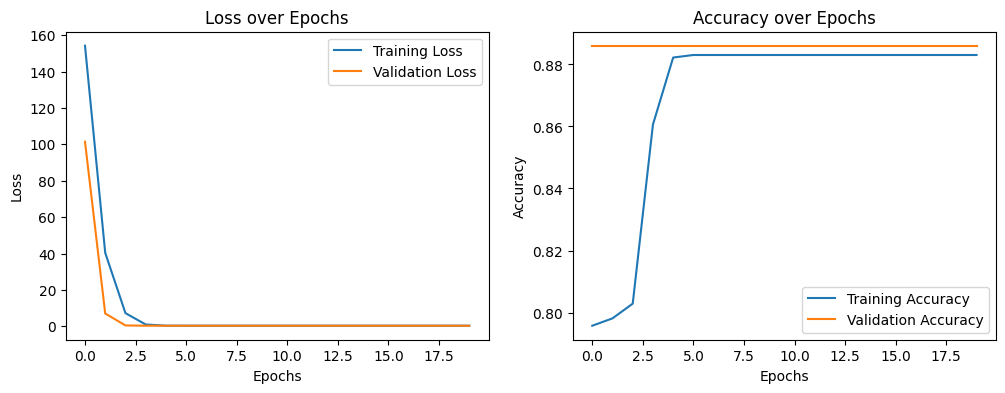

In [23]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Save the Model
Save the trained model for submission.

In [25]:
from keras.models import load_model
model.save('ANN.exam.h5')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?
3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?
5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here: